In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [3]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [4]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
      data[i]=data[i].fillna(data[i].median())

In [5]:
data.isna().sum()

,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


before scaling we identify independent variable and target

In [6]:
# target---pure alcohol
x=data.drop('total_litres_of_pure_alcohol',axis=1)

In [7]:
y=data['total_litres_of_pure_alcohol']

In [8]:
x.head()

,country,beer_servings,spirit_servings,wine_servings,continent
0,Afghanistan,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,Europe
2,Algeria,25.0,0.0,14.0,Africa
3,Andorra,245.0,138.0,312.0,Europe
4,Angola,217.0,57.0,45.0,Africa


In [9]:
y.head()

,total_litres_of_pure_alcohol
0,0.0
1,4.9
2,0.7
3,12.4
4,5.9


perform standaridisation on x

In [10]:
x.shape

(193, 5)

In [11]:
x.country.nunique()

193

In [12]:
x=x.drop('country',axis=1)

In [13]:
x.head()

,beer_servings,spirit_servings,wine_servings,continent
0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,Europe
2,25.0,0.0,14.0,Africa
3,245.0,138.0,312.0,Europe
4,217.0,57.0,45.0,Africa


In [14]:
#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['continent']=le.fit_transform(x['continent'])

In [15]:
x.head()

,beer_servings,spirit_servings,wine_servings,continent
0,0.0,0.0,0.0,1
1,89.0,132.0,54.0,2
2,25.0,0.0,14.0,0
3,245.0,138.0,312.0,2
4,217.0,57.0,45.0,0


In [16]:
x1=x.drop('continent',axis=1)

In [17]:
x1.head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [18]:
# Min map scaling
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x1=min_max.fit_transform(x1)

In [19]:
type(x1)

numpy.ndarray

In [20]:
x1=pd.DataFrame(x1,columns=['beer_servings', 'spirit_servings', 'wine_servings'])

In [21]:
type(x1)

pandas.core.frame.DataFrame

In [22]:
x1.head()

,beer_servings,spirit_servings,wine_servings
0,0.000000,0.000000,0.000000
1,0.236702,0.301370,0.145946
2,0.066489,0.000000,0.037838
3,0.651596,0.315068,0.843243
4,0.577128,0.130137,0.121622


In [23]:
x=x.drop(['beer_servings', 'spirit_servings', 'wine_servings'],axis=1)

In [24]:
x=pd.concat([x,x1],axis=1)

In [25]:
x.head()

,continent,beer_servings,spirit_servings,wine_servings
0,1,0.000000,0.000000,0.000000
1,2,0.236702,0.301370,0.145946
2,0,0.066489,0.000000,0.037838
3,2,0.651596,0.315068,0.843243
4,0,0.577128,0.130137,0.121622


In [26]:
# Standard scaling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')

In [27]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
      data[i]=data[i].fillna(data[i].median())

In [28]:
data.isna().sum()

,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


In [29]:
x=data.drop('total_litres_of_pure_alcohol',axis=1)

In [30]:
y=data['total_litres_of_pure_alcohol']

In [31]:
x=x.drop('country',axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['continent']=le.fit_transform(x['continent'])

In [33]:
x1=x.drop('continent',axis=1)

In [34]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x1=std.fit_transform(x1)

In [35]:
type(x1)

numpy.ndarray

In [36]:
x1=pd.DataFrame(x1,columns=['beer_servings', 'spirit_servings', 'wine_servings'])

In [37]:
type(x1)

pandas.core.frame.DataFrame

In [38]:
x=x.drop(['beer_servings', 'spirit_servings', 'wine_servings'],axis=1)

In [39]:
x=pd.concat([x,x1],axis=1)

In [40]:
x.head()

,continent,beer_servings,spirit_servings,wine_servings
0,1,-1.056880,-0.943742,-0.617162
1,2,-0.151713,0.570668,0.064562
2,0,-0.802619,-0.943742,-0.440419
3,2,1.434871,0.639505,3.321685
4,0,1.150100,-0.289792,-0.049059


In [63]:
# Normalization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')

In [64]:
x=data.drop('total_litres_of_pure_alcohol',axis=1)

In [65]:
y=data['total_litres_of_pure_alcohol']

In [66]:
x=x.drop('country',axis=1)

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['continent']=le.fit_transform(x['continent'])

In [68]:
x1=x.drop('continent',axis=1)

In [83]:
from sklearn.preprocessing import normalize
x1 = normalize(x1)

ValueError: Input contains NaN.

In [73]:
type(x1)

pandas.core.frame.DataFrame

In [75]:
x1=pd.DataFrame(x1,columns=['beer_servings', 'spirit_servings', 'wine_servings'])

In [76]:
type(x1)

pandas.core.frame.DataFrame

In [77]:
x=x.drop(['beer_servings', 'spirit_servings', 'wine_servings'],axis=1)

In [78]:
x=pd.concat([x,x1],axis=1)

In [79]:
x.head()

,continent,beer_servings,spirit_servings,wine_servings
0,1,0.0,0.0,0.0
1,2,89.0,132.0,54.0
2,0,25.0,0.0,14.0
3,2,245.0,138.0,312.0
4,0,217.0,57.0,45.0


In [84]:
# Correlation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')

In [85]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
      data[i]=data[i].fillna(data[i].median())

In [86]:
data.isna().sum()

,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['continent']=le.fit_transform(data['continent'])

In [88]:
data=data.drop('country',axis=1)

In [89]:
corr_matrix=data.corr()

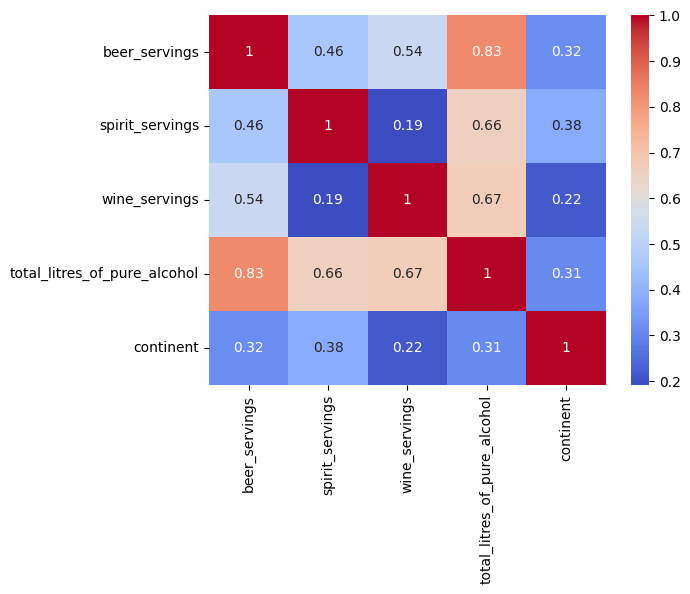

In [90]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()